In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from skimage.filters import threshold_triangle  #https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_multiotsu
from skimage import io  #to io.imread, io.imshow tiff images
from sklearn.cluster import KMeans
import pandas as pd
from skimage.measure import regionprops,label  #https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html#sphx-glr-auto-examples-segmentation-plot-regionprops-py

def joonis(orig,otitle,cmap1,data,dtitle,cmap2,vmin,vmax,size):
    fig, panel = plt.subplots(2, 1, figsize=(size[0],size[1]))
    im0=panel[0].imshow(orig,cmap=cmap1,vmin=vmin[0],vmax=vmax[0])
    panel[0].set_title(otitle+f' {np.min(orig):.3f}..{np.max(orig):.3f}')
    im1=panel[1].imshow(data,cmap=cmap2,vmin=vmin[1],vmax=vmax[1])
    panel[1].set_title(dtitle+f' {np.min(data):.3f}..{np.max(data):.3f}')
    fig.colorbar(im1,ax=panel[1],cax=fig.add_axes([0.92, 0.25, 0.02, 0.5]))  #cax prevents colorbar to change img size
    plt.show()

## MEXG
Modified Excess Green (MEXG) index suggested in X.P. Burgos-Artizzu, Comput. Electron. Agric. 75 (2011) 337 is used to differentiate weeds and crops in early season

In [2]:
def MEXG(RED,GREEN,BLUE):
    return 1.262*GREEN-0.884*RED-0.311*BLUE

We have 38x2 beds in the field. Typical bed is uploaded and analysed below. It is given by 5-channel drone tiff image with R,G,B,NIR,REG(red edge) channels

In [3]:
filename='2021-05-31_NW033_N150_1_drone_rot.tif'
image = io.imread(filename)
R,G,B,NIR,RE=[image[:,:,i] for i in range(5)]

In [4]:
mexg=MEXG(R,G,B)

Lets visualise G channel and MEXG index

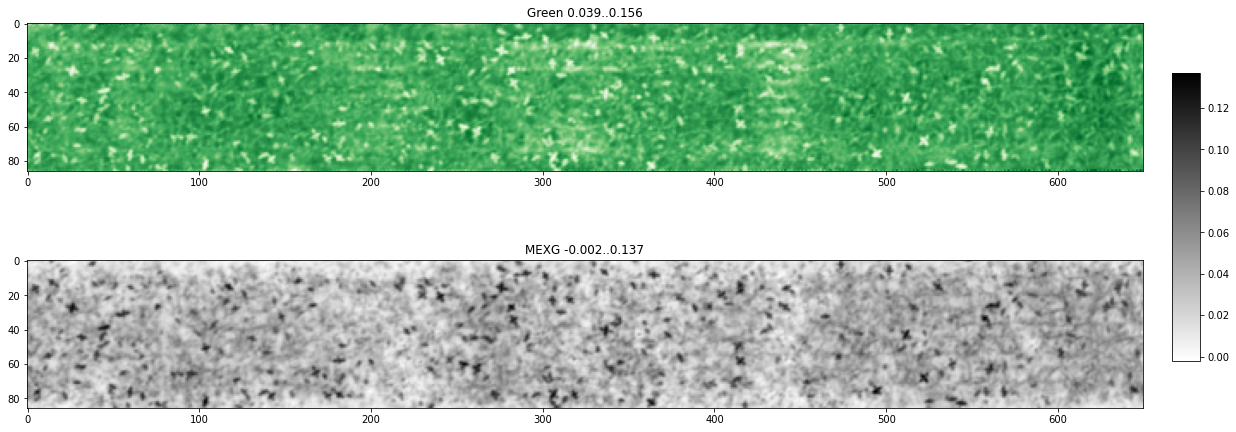

In [5]:
joonis(G,'Green',plt.cm.Greens_r, mexg,'MEXG','binary',vmin=[0.039,-0.002],vmax=[0.156,0.137],size=[20,8])

Darker dots in figure are weeds located in the bed.

## KMeans analysis
Lets cluster our data by KMeans algoritm

In [6]:
mexg_flat=mexg.flatten()
cluster_data = pd.DataFrame({'val':mexg_flat})
K_options = np.arange(1,10)
inertia = [KMeans(n_clusters=k, random_state=0).fit(cluster_data).inertia_ for k in K_options]

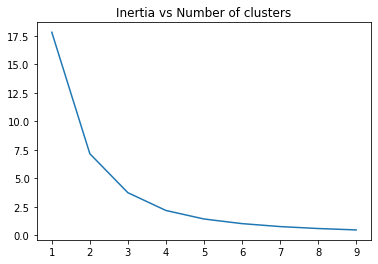

In [7]:
plt.plot(K_options, inertia)
plt.title('Inertia vs Number of clusters')
plt.show()

According to Elbow method, we choose 3 clusters - crop, weed, soil

In [8]:
kmeans = KMeans(n_clusters = 3, verbose=1, n_init = 25, max_iter = 500).fit(cluster_data)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.34774855562419
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.8742118596698845
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.7807106102276373
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.7611896384111096
start iteration
done sorting
end inner loop
Iteration 4, inertia 3.756463016153627
start iteration
done sorting
end inner loop
Iteration 5, inertia 3.7548709172641948
start iteration
done sorting
end inner loop
Iteration 6, inertia 3.7539098226163357
start iteration
done sorting
end inner loop
Iteration 7, inertia 3.7532456254251327
start iteration
done sorting
end inner loop
Iteration 8, inertia 3.752852545137245
start iteration
done sorting
end inner loop
Iteration 9, inertia 3.7525295110016015
start iteration
done sorting
end inner loop
Iteration 10, inertia 3.7522751952435356
center shift 1.760301e-04 within tolerance 3.188276e-08

Iteration 14, inertia 3.7540077015796864
start iteration
done sorting
end inner loop
Iteration 15, inertia 3.7533167563065577
start iteration
done sorting
end inner loop
Iteration 16, inertia 3.752901059370686
start iteration
done sorting
end inner loop
Iteration 17, inertia 3.7525354252517493
start iteration
done sorting
end inner loop
Iteration 18, inertia 3.752245819848083
center shift 1.712322e-04 within tolerance 3.188276e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 5.34215547755905
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.5966345419070676
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.2227374010092635
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.031532570319622
start iteration
done sorting
end inner loop
Iteration 4, inertia 3.9233360265232076
start iteration
done sorting
end inner loop
Iteration 5, inertia 3.859694937521579
start iteration
done sorting
end inner lo

start iteration
done sorting
end inner loop
Iteration 0, inertia 4.106969121028294
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.8805072071743907
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.8267344791657636
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.804485267200631
start iteration
done sorting
end inner loop
Iteration 4, inertia 3.790467687969402
start iteration
done sorting
end inner loop
Iteration 5, inertia 3.7802145444437296
start iteration
done sorting
end inner loop
Iteration 6, inertia 3.772889179988529
start iteration
done sorting
end inner loop
Iteration 7, inertia 3.767218324854276
start iteration
done sorting
end inner loop
Iteration 8, inertia 3.763091929210737
start iteration
done sorting
end inner loop
Iteration 9, inertia 3.760377864751579
start iteration
done sorting
end inner loop
Iteration 10, inertia 3.758314199468039
start iteration
done sorting
end inner loop
Iteration 11, inertia 3.756595360708262

Iteration 10, inertia 3.7881263749246608
start iteration
done sorting
end inner loop
Iteration 11, inertia 3.778573009238162
start iteration
done sorting
end inner loop
Iteration 12, inertia 3.7717434209871183
start iteration
done sorting
end inner loop
Iteration 13, inertia 3.7662425744805903
start iteration
done sorting
end inner loop
Iteration 14, inertia 3.7624029064243847
start iteration
done sorting
end inner loop
Iteration 15, inertia 3.7598419364174793
start iteration
done sorting
end inner loop
Iteration 16, inertia 3.7578642787449175
start iteration
done sorting
end inner loop
Iteration 17, inertia 3.7562001011895996
start iteration
done sorting
end inner loop
Iteration 18, inertia 3.7550798026725793
start iteration
done sorting
end inner loop
Iteration 19, inertia 3.754274488167317
start iteration
done sorting
end inner loop
Iteration 20, inertia 3.7535241834967126
start iteration
done sorting
end inner loop
Iteration 21, inertia 3.753020147233789
start iteration
done sortin

Iteration 18, inertia 3.7555814905312452
start iteration
done sorting
end inner loop
Iteration 19, inertia 3.75469743485927
start iteration
done sorting
end inner loop
Iteration 20, inertia 3.753911379392569
start iteration
done sorting
end inner loop
Iteration 21, inertia 3.753254758758115
start iteration
done sorting
end inner loop
Iteration 22, inertia 3.7528548690352035
start iteration
done sorting
end inner loop
Iteration 23, inertia 3.7525150802746503
start iteration
done sorting
end inner loop
Iteration 24, inertia 3.7522345319445782
center shift 1.669252e-04 within tolerance 3.188276e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.9679684647310545
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.8918526241200064
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.85240981437246
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.827597503248618
start iteration
done sorting
end inner l

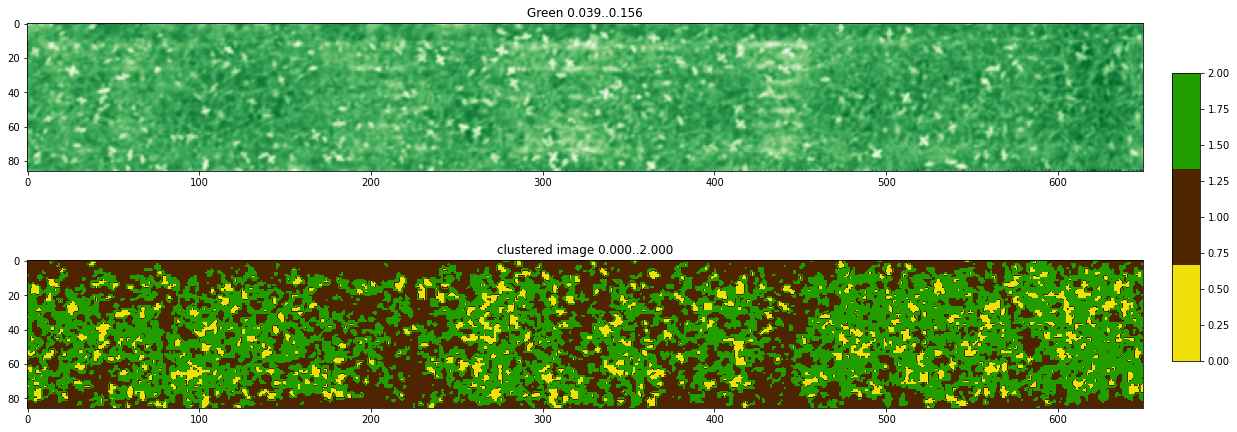

In [11]:
soil='#4f2400'
weed='#f0e10a'
crop='#229d00'

mycmap2 = colors.ListedColormap([weed,soil,crop])
joonis(G,'Green',plt.cm.Greens_r,labels.reshape(mexg.shape),'clustered image',mycmap2,vmin=[0.039,0],vmax=[0.156,2],size=[20,8])

plt.imsave('kmeans_mexg.png',labels.reshape(mexg.shape),cmap=mycmap2)

In [10]:
print(f'MEXG values of cluster centers {[centers[i,0] for i in range(3)]}')

MEXG values of cluster centers [0.07674323041384974, 0.025464582385153048, 0.04721770957057045]


Pie plot of soil, crop and weed

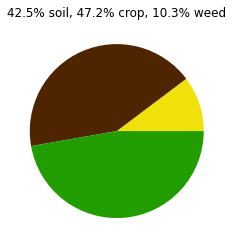

In [29]:
ratio=100*np.array([np.sum(labels==i) for i in range(3)])/np.product(mexg.shape)

plt.pie(ratio,colors=[weed,soil,crop])
plt.title(f'{ratio[1]:.1f}% soil, {ratio[2]:.1f}% crop, {ratio[0]:.1f}% weed')
plt.savefig('kmeans_pie.png')

## Thresholding and feature extraction
Here we apply image analysis to get additional information on weeds. 
First, we apply thresholding to differentiate weeds.

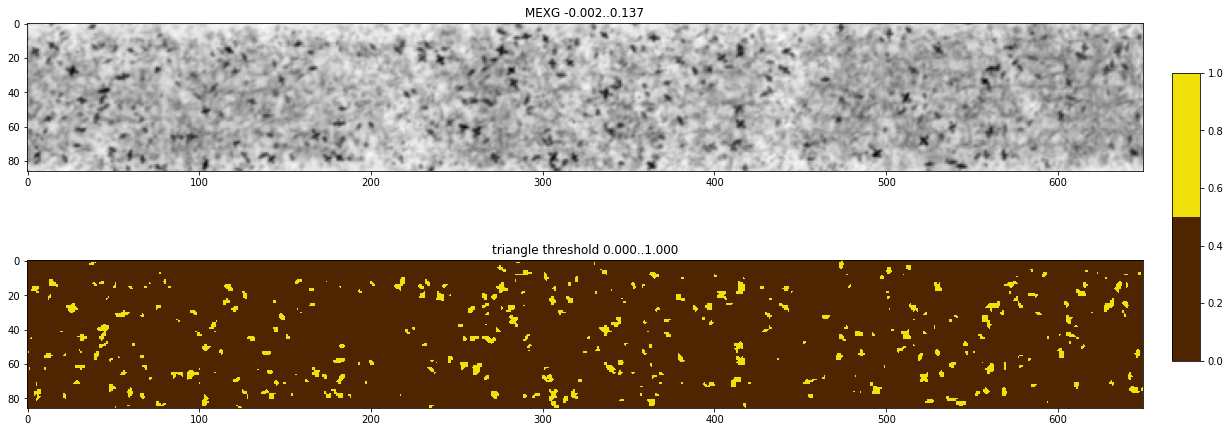

In [15]:
mycmap = colors.ListedColormap([soil,weed])

tr_mexg= mexg > threshold_triangle(mexg)
joonis(mexg,'MEXG','binary',tr_mexg,'triangle threshold',mycmap,vmin=[-0.002,0],vmax=[0.137,1],size=[20,8])

plt.imsave('tr_mexg.png',tr_mexg,cmap=mycmap)

Estimated weed density is

In [16]:
weed_density=np.bincount(tr_mexg.flatten())
print(f'weed density {100*weed_density[1]/sum(weed_density):.1f}%')

weed density 4.5%


We use skimage.measure.label to get connected areas from threshold image

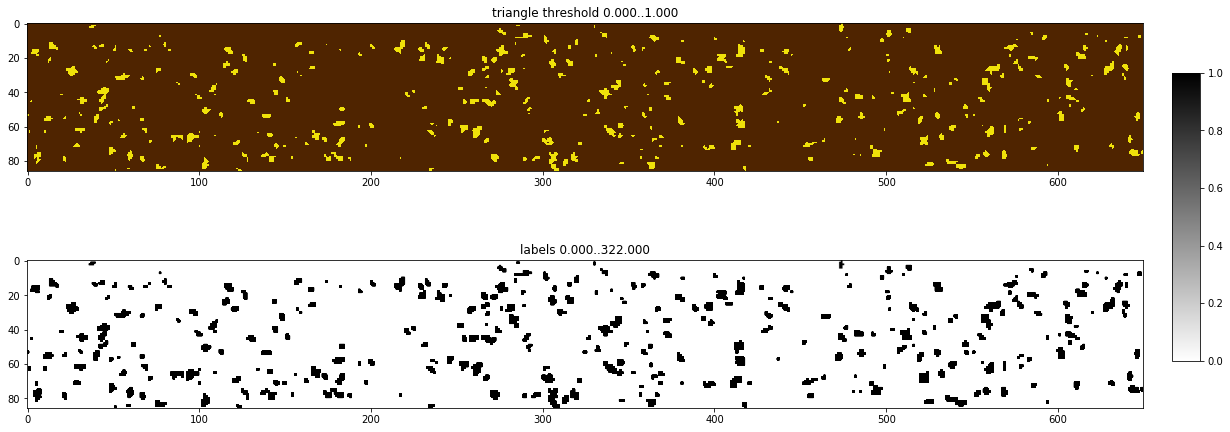

In [17]:
label_img = label(tr_mexg)
joonis(tr_mexg,'triangle threshold',mycmap,label_img,'labels','binary',vmin=[0,0],vmax=[1,1],size=[20,8])

There are 0..322 connected regions. Now we find properties of connected regions

In [18]:
props=regionprops(label_img) #https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

Lets check some useful properties which can be used to characterise connected regions. Lets consider region with number 160

In [19]:
_label=160
props[_label]['centroid']

(43.357142857142854, 607.8571428571429)

In [20]:
props[_label]['area']

14

In [21]:
props[_label]['inertia_tensor']

C:\Users\artjom\Miniconda3\envs\env36\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\artjom\Miniconda3\envs\env36\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


array([[ 4.26530612, -1.62244898],
       [-1.62244898,  0.94387755]])

In [22]:
props[_label]['perimeter']

10.82842712474619

In addition to these region characteristics we calculate two more. The function below returns the amount of connected regions and their relative area in the vicinity of considered region. The vicinity is defined by radius `d` around considered region labelled by `label`.   

In [25]:
def density_area(labels,label,d):
    props=regionprops(labels)
    x0=props[label]['centroid'][1]#x coord of label centroid  
    y0=props[label]['centroid'][0]#y coord of label centroid
    x0_0=0
    if (x0>d)&(labels.shape[1]-x0>d):
        x0_0=x0-np.random.uniform(low=0,high=d,size=1)[0]# x0-random_shift...x0-random_shift+d
    elif x0<=d:
        x0_0=np.random.uniform(low=0,high=x0,size=1)[0]
    else: #labels.shape[1]-x0<=d
        x0_0=np.random.uniform(low=x0,high=labels.shape[1],size=1)[0]-d
    y0_0=0
    if (y0>d)&(labels.shape[0]-y0>d):
        y0_0=y0-np.random.uniform(low=0,high=d,size=1)[0]# y0-random_shift...y0-random_shift+d
    elif y0<=d:
        y0_0=np.random.uniform(low=0,high=y0,size=1)[0]
    else: #labels.shape[0]-y0<=d
        y0_0=np.random.uniform(low=y0,high=labels.shape[0],size=1)[0]-d
    density=0
    area=0
    for i in range(labels.max()):
        if (props[i]['centroid'][1]>=x0_0)&(props[i]['centroid'][1]<=x0_0+d)&(props[i]['centroid'][0]>=y0_0)&(props[i]['centroid'][0]<=y0_0+d):
                density=density+1
                area=area+props[i]['area']
    return (density,area/d**2)

print(density_area(label_img,_label,50))

(13, 0.0328)


Collected region features can be placed in separate table

In [26]:
df = pd.DataFrame(columns=['area','perimeter','inertia11','inertia12','inertia21','inertia22','x','y','density_around','area_around','N','NW'])

where NW and N are crop genotype ID and nitrogen rate used, respectively, extracted from tiff image title. 

In [27]:
df = df.append({
    'area': props[_label]['area'],
    'perimeter': props[_label]['perimeter'],
    'inertia11': props[_label]['inertia_tensor'][0,0],
    'inertia12': props[_label]['inertia_tensor'][0,1],
    'inertia21': props[_label]['inertia_tensor'][1,0],
    'inertia22': props[_label]['inertia_tensor'][1,1],
    'x': props[_label]['centroid'][1],
    'y': props[_label]['centroid'][0],
    'density_around': density_area(label_img,_label,50)[0],
    'area_around': density_area(label_img,_label,50)[1],
    'N': int(filename.split('_N')[2].split('_')[0]),
    'NW': int(filename.split('_N')[1].split('W')[1])
      }, ignore_index=True)

In [28]:
df

,area,perimeter,inertia11,inertia12,inertia21,inertia22,x,y,density_around,area_around,N,NW
0,14.0,10.828427,4.265306,-1.622449,-1.622449,0.943878,607.857143,43.357143,20.0,0.0376,150.0,33.0


By extractiong this information on each weed region in each bed on the field we can get a database which allows to perform various machine learning tasks. For instance, predict Nitrogen rate used on a bed as a function of weed characteristics by assuming that both crop and weeds grow rate are affected by Nitrogen. 